# lab 1 Amelin Viacheslav IP-05
Develop an algorithm for generating a road in the form of a graph. Where the vertices of the graph are intersections, and the edges of the graph are roads between intersections. The intersections should be arranged in a square grid.

To execute the code, we need to specify size and delete. Size is the width and height of our graph. Size must be greater than 1. Delete is the number of edges to delete in the graph. This value should not exceed the maximum value of deleted edges in size (2**(size-1)) + 2.


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [4]:
size = 5
delete = 9

In [5]:
if(size < 2):
    raise ValueError("size must be greater than 1")
maxDelete = (2**(size-1)) + 2
if(maxDelete < delete):
    raise ValueError(f"removal should be no more than, {maxDelete}")

In [6]:
G = nx.grid_2d_graph(size, size)

## Algorithm

The algorithm will work until the required number of edges is removed. Each time we have a vertex chosen at random, from which we randomly choose another vertex from which to remove an edge. If these vertices are not connected, it can be when either an edge is already removed or there is no suitable vertex, then we start all over again to select new nodes.   

In [7]:
count = 0
nodeList = list(G.nodes());

while count < delete:
    randomEdgeCol = random.randint(-1, 1)
    randomEdgeRow = random.randint(-1, 1)
    
    randomNode = random.choice(nodeList)
    nodeCol, nodeRow = randomNode[0] + randomEdgeCol, randomNode[1] + randomEdgeRow
    
    if(G.has_edge(randomNode, (nodeCol, nodeRow))): 
        G.remove_edge(randomNode, (nodeCol, nodeRow))
        if not nx.is_connected(G):
            G.add_edge(randomNode, (nodeCol, nodeRow))
        else: count += 1

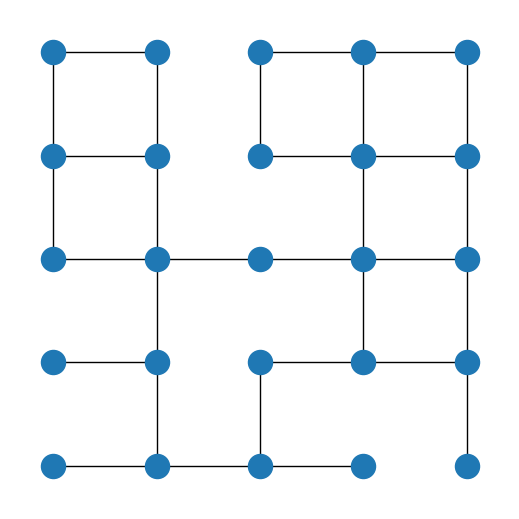

In [8]:
plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos)